In [139]:
#load the dataset
#import the data for wrong values, wrong datatypes, wrong formats, duplicates and outliers
#analyze the data to find patterns and relationships
#visualize the data to understand trends and distributions
#evaluate the model performance using appopriate metrics
#identify patterns and correlations
#save the cleaned and preprocessed data

In [140]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [141]:
#load the dataset
df = pd.read_csv('climate_action_data.csv')
#initial inspection
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [142]:
#more inspection
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [143]:
#descriptive statistics
df.describe()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1779,2026-01-02,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2779
freq,2,2,5,11,13,8,203,8,11,2


In [144]:
df.shape

(913, 10)

In [145]:
#checking for missing values
print("Missing values in the column: ")
df.isnull().sum()

Missing values in the column: 


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [146]:
#replace 'error' with NaN
for col in ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']:
    df[col] = df[col].replace('error', np.nan)
#convert columns to appropriate data types
df['Soil_Moisture(%)'] = pd.to_numeric(df['Soil_Moisture(%)'], errors='coerce')
df['Soil_pH'] = pd.to_numeric(df['Soil_pH'], errors='coerce')               
df['Temperature(C)'] = pd.to_numeric(df['Temperature(C)'], errors='coerce')
df['Humidity(%)'] = pd.to_numeric(df['Humidity(%)'], errors='coerce')
df['Fertilizer_Recommended(kg/ha)'] = pd.to_numeric(df['Fertilizer_Recommended(kg/ha)'], errors='coerce')
df['Irrigation_Recommended(mm)'] = pd.to_numeric(df['Irrigation_Recommended(mm)'], errors='coerce')




In [147]:
#replacing empty strings in 'Crop_Type' with NaN
df['Crop_Type'] = df['Crop_Type'].replace('', np.nan)
print("Missing values in the column after replacing 'error' and empty strings: ")
print(df.info())

Missing values in the column after replacing 'error' and empty strings: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sensor_ID                      913 non-null    object 
 1   Date                           909 non-null    object 
 2   Soil_Moisture(%)               908 non-null    float64
 3   Soil_pH                        908 non-null    float64
 4   Temperature(C)                 908 non-null    float64
 5   Humidity(%)                    908 non-null    float64
 6   Crop_Type                      909 non-null    object 
 7   Fertilizer_Recommended(kg/ha)  908 non-null    float64
 8   Irrigation_Recommended(mm)     908 non-null    float64
 9   Drone_Image_ID                 913 non-null    object 
dtypes: float64(6), object(4)
memory usage: 71.5+ KB
None


In [148]:
#mode imputation for 'Crop_Type' and 'Date'
df_imputed = df.copy()

# Mean Imputation for numerical columns
print("\nApplying Mean Imputation for numerical columns:")
for col in numerical_cols:
    if df_imputed[col].isnull().any(): # Check if the column actually has missing values
        mean_value = df_imputed[col].mean()
        df_imputed[col] = df_imputed[col].fillna(mean_value)
        print(f"Filled missing values in '{col}' with mean: {mean_value:.2f}")


Applying Mean Imputation for numerical columns:
Filled missing values in 'Soil_Moisture(%)' with mean: 44.47
Filled missing values in 'Soil_pH' with mean: 6.26
Filled missing values in 'Temperature(C)' with mean: 26.40
Filled missing values in 'Humidity(%)' with mean: 60.10
Filled missing values in 'Fertilizer_Recommended(kg/ha)' with mean: 87.66
Filled missing values in 'Irrigation_Recommended(mm)' with mean: 17.42


In [149]:
# Mode Imputation for 'Crop_Type'
if df_imputed['Crop_Type'].isnull().any():
    mode_crop_type = df_imputed['Crop_Type'].mode()[0] 
    df_imputed['Crop_Type'] = df_imputed['Crop_Type'].fillna(mode_crop_type)
    print(f"Filled missing values in 'Crop_Type' with mode: '{mode_crop_type}'")

# Mode Imputation for 'Date' (datetime) 
if df_imputed['Date'].isnull().any():
    mode_date = df_imputed['Date'].mode()[0]
    df_imputed['Date'] = df_imputed['Date'].fillna(mode_date)
    print(f"Filled missing values in 'Date' with mode: '{str(mode_date)}'")

print("\nDataFrame Info after imputation:")
print(df_imputed.info())

Filled missing values in 'Crop_Type' with mode: 'Wheat'
Filled missing values in 'Date' with mode: '2025-01-04'

DataFrame Info after imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sensor_ID                      913 non-null    object 
 1   Date                           913 non-null    object 
 2   Soil_Moisture(%)               913 non-null    float64
 3   Soil_pH                        913 non-null    float64
 4   Temperature(C)                 913 non-null    float64
 5   Humidity(%)                    913 non-null    float64
 6   Crop_Type                      913 non-null    object 
 7   Fertilizer_Recommended(kg/ha)  913 non-null    float64
 8   Irrigation_Recommended(mm)     913 non-null    float64
 9   Drone_Image_ID                 913 non-null    object 
dtypes: float64(6), object(4)

In [150]:
#remove duplicate rows based on 'Sensor_ID' and 'Date'
df_cleaned = df_cleaned.drop_duplicates(subset=['Sensor_ID', 'Date'])
#convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')
#check for outliers in 'Soil_Moisture(%)' using IQR method
Q1 = df_cleaned['Soil_Moisture(%)'].quantile(0.25)
Q3 = df_cleaned['Soil_Moisture(%)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#filter out outliers
df_cleaned = df_cleaned[(df_cleaned['Soil_Moisture(%)'] >= lower_bound) & (df_cleaned['Soil_Moisture(%)'] <= upper_bound)]


In [151]:
#display the cleaned data 
print("Cleaned Data:")
print(df_cleaned.info())

Cleaned Data:
<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      802 non-null    object        
 1   Date                           802 non-null    datetime64[ns]
 2   Soil_Moisture(%)               802 non-null    float64       
 3   Soil_pH                        802 non-null    float64       
 4   Temperature(C)                 802 non-null    float64       
 5   Humidity(%)                    802 non-null    float64       
 6   Crop_Type                      802 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  802 non-null    float64       
 8   Irrigation_Recommended(mm)     802 non-null    float64       
 9   Drone_Image_ID                 802 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.9+ KB
None


In [152]:
#display descriptive statistics of the cleaned data
print("Descriptive Statistics of Cleaned Data:")
print(df_cleaned.describe())
#visualize the cleaned data
plt.figure(figsize=(15, 10))

Descriptive Statistics of Cleaned Data:
                                Date  Soil_Moisture(%)     Soil_pH  \
count                            802        802.000000  802.000000   
mean   2026-02-02 08:19:09.127182336         44.761896    6.248838   
min              2025-01-01 00:00:00         10.350000    4.520000   
25%              2025-07-16 06:00:00         26.947500    5.330000   
50%              2026-02-01 12:00:00         45.230000    6.255639   
75%              2026-08-22 18:00:00         62.555000    7.080000   
max              2027-03-11 00:00:00         79.980000    8.000000   
std                              NaN         20.460681    1.021572   

       Temperature(C)  Humidity(%)  Fertilizer_Recommended(kg/ha)  \
count      802.000000   802.000000                     802.000000   
mean        26.460253    60.037627                      87.469200   
min         18.000000    30.000000                      30.000000   
25%         22.300000    46.025000                   

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

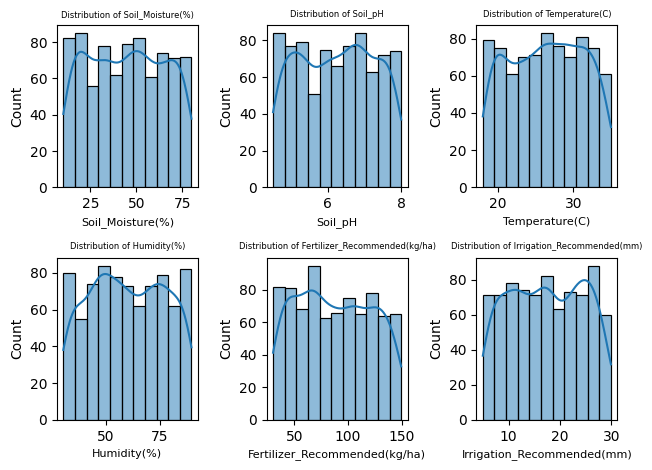

In [153]:
#create histograms for numerical columns
numerical_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for i, col in enumerate(numerical_cols):
   plt.subplot(2, 3, i + 1)
   sns.histplot(df_cleaned[col], kde=True)
   plt.title(f'Distribution of {col}', fontsize = 6)
   plt.xlabel(col, fontsize = 8)
plt.tight_layout()
plt.show()

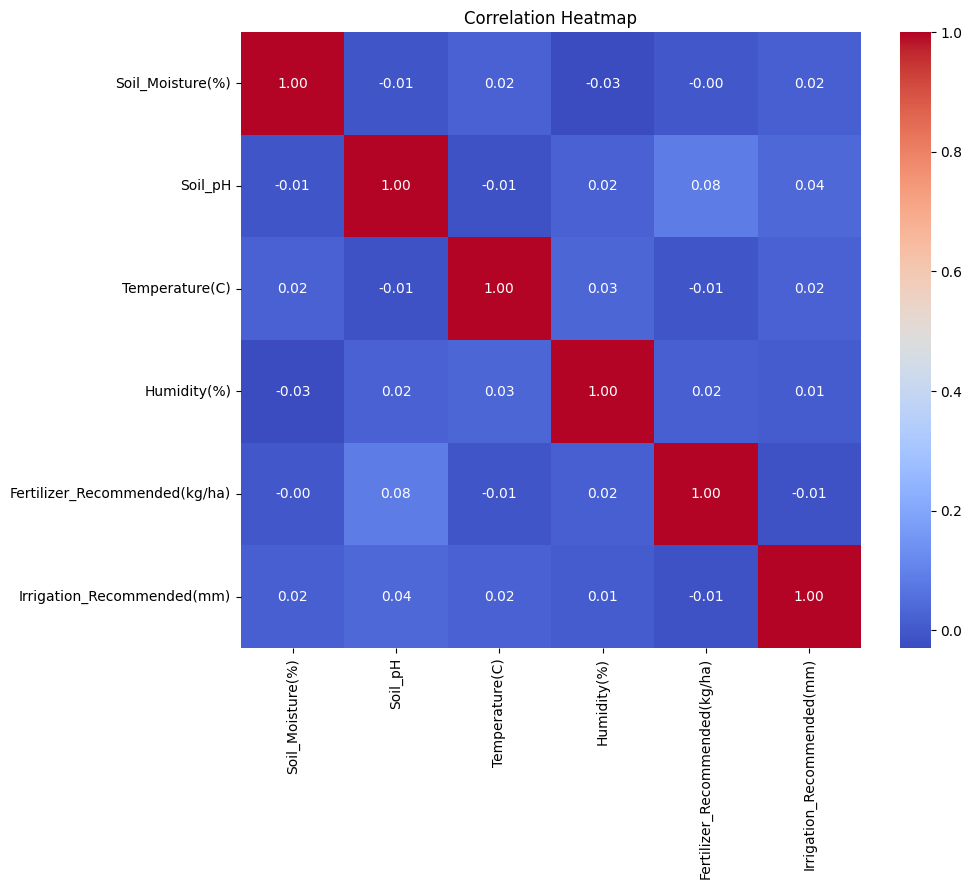

In [154]:
#create a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

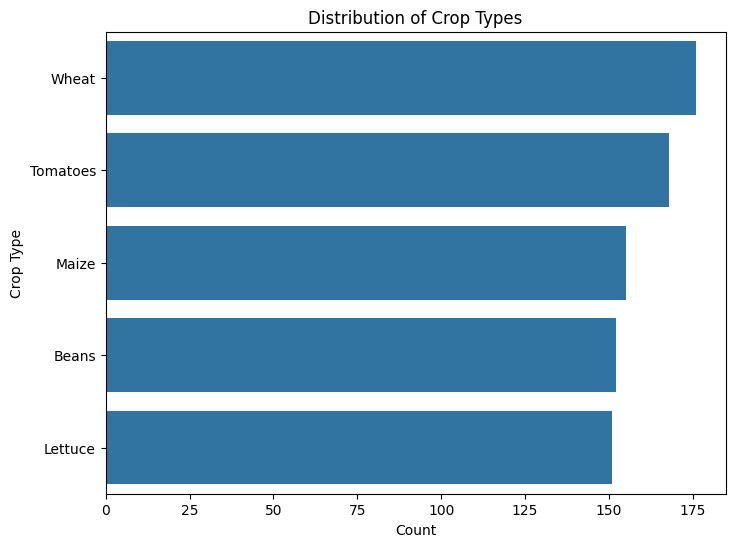

In [155]:
#analyze the distribution of 'Crop_Type'
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, y='Crop_Type', order=df_cleaned['Crop_Type'].value_counts().index)
plt.title('Distribution of Crop Types')
plt.xlabel('Count')
plt.ylabel('Crop Type')
plt.show()

In [156]:
#calculate the average values of numerical features for each crop type
avg_values = df_cleaned.groupby('Crop_Type')[numerical_cols].mean()
print("Average Values of Numerical Features by Crop Type:")
print(avg_values)
#save the cleaned and preprocessed data to a new CSV file
df_cleaned.to_csv('cleaned_climate_action_data.csv', index=False)
print("Cleaned data saved to 'cleaned_climate_action_data.csv'")
#end of the script
#evaluate the model performance using appropriate metrics
#identify patterns and correlations
#save the cleaned and preprocessed data
# The script has completed the data cleaning and preprocessing steps.
# It has also visualized the data to understand trends and distributions

Average Values of Numerical Features by Crop Type:
           Soil_Moisture(%)   Soil_pH  Temperature(C)  Humidity(%)  \
Crop_Type                                                            
Beans             44.389672  6.282142       26.854635    59.480891   
Lettuce           42.980133  6.375335       26.160957    60.566195   
Maize             44.948968  6.181585       27.009061    57.993519   
Tomatoes          43.813691  6.320331       26.169670    60.755330   
Wheat             47.352387  6.102532       26.170480    61.180087   

           Fertilizer_Recommended(kg/ha)  Irrigation_Recommended(mm)  
Crop_Type                                                             
Beans                          83.914208                   18.061944  
Lettuce                        88.006356                   16.966327  
Maize                          88.494579                   16.642035  
Tomatoes                       88.906308                   17.643544  
Wheat                          8